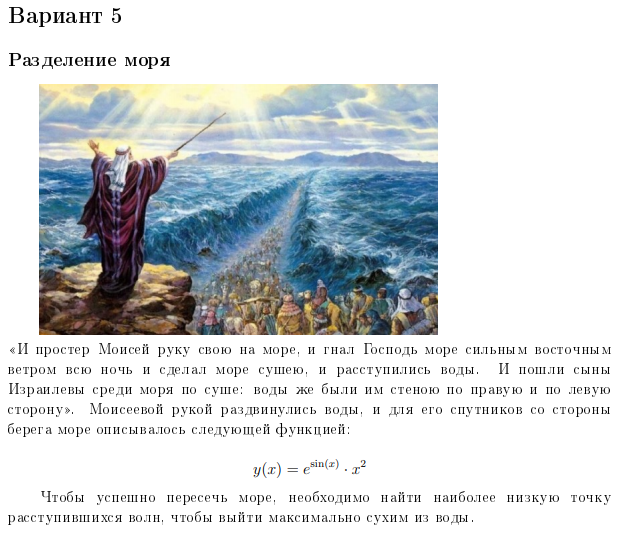

## Функция для минимизации

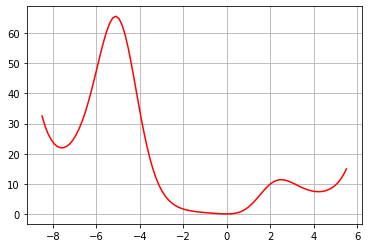

In [19]:
from math import e, sqrt, copysign, pi
from numpy import sin, cos
import pandas as pd


def func(x):
    return e**sin(x) * x**2


drawFunction(-5, 2)

### Точность

In [3]:
eps = 1e-9


def exp(x):
    return "%.3E" % x

### Рисование графика

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets


def drawPlot(data):
    def update(step = 0):
        x1, x2 = data[4 * (step // 4)]
        x = np.linspace(x1 - (x2 - x1) / 2, x2 + (x2 - x1) / 2, 100)
        y = func(x)
        
        fig = plt.figure()
        ax = fig.add_subplot(1, 1, 1)
        line, = ax.plot(x, y, 'r')
        plt.grid()
        
        x1, x2 = data[step]
        line, = ax.plot([x1, x2], [func(x1), func(x2)], 'g')
        plt.text(x1, func(x1), f'({exp(x1)}, {exp(func(x1))})')
        plt.text(x2, func(x2), f'({exp(x2)}, {exp(func(x2))})')
        
        fig.canvas.draw_idle()
        
    widgets.interact(update, step=widgets.IntSlider(value=0, min=0, max=len(data)-1, step=1))
    
    
def drawFunction(x1, x2):
    x = np.linspace(x1 - (x2 - x1) / 2, x2 + (x2 - x1) / 2, 100)
    y = func(x)
        
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    line, = ax.plot(x, y, 'r')
    plt.grid()
    
    fig.canvas.draw_idle()

### Метод дихотомии

In [5]:
def dichotomyMethod(l, r):
    data = [(l, r)]
    
    while r - l > eps:
        delta = eps / 4
        x1, x2 = (l + r) / 2 - delta, (l + r) / 2 + delta
        y1, y2 = func(x1), func(x2)
        
        if y1 < y2:
            r = x1
        elif y1 > y2:
            l = x2
        else:
            l, r = x1, x2
            
        data.append((l, r))
       
    if flag == 'print':
        print(f'Dichotomy method found local minimum in {len(data) - 1} steps\n' \
              f'x = {(l + r) / 2}\n' \
              f'Where y(x) = {func((l + r) / 2)}')
    return data

### Метод золотого сечения

In [6]:
def goldenRatioMethod(l, r):
    data = [(l, r)]
    
    x1, x2 = l + (3 - sqrt(5)) / 2 * (r - l), r - (3 - sqrt(5)) / 2 * (r - l)
    y1, y2 = func(x1), func(x2)
    
    while r - l > eps:
        if y1 < y2:
            r, x2, y2 = x2, x1, y1
            x1 = l + (3 - sqrt(5)) / 2 * (r - l)
            y1 = func(x1)
        else:
            l, x1, y1 = x1, x2, y2
            x2 = r - (3 - sqrt(5)) / 2 * (r - l)
            y2 = func(x2)
            
        data.append((l, r))
    
    if flag == 'print':
        print(f'Golden Ratio method found local minimum in {len(data) - 1} steps\n' \
              f'x = {(l + r) / 2}\n' \
              f'Where y(x) = {func((l + r) / 2)}')
    return data

### Метод Фибоначчи

In [7]:
def fibonacciMethod(l, r):
    data = [(l, r)]
    
    array = [0, 1]
    while array[-1] <= (r - l) / eps:
        array.append(array[-1] + array[-2])
    n = len(array) - 3

    x1, x2 = l + array[-3] / array[-1] * (r - l), l + array[-2] / array[-1] * (r - l)
    y1, y2 = func(x1), func(x2)
    l0, r0 = l, r
    
    for k in range(2, n + 1):
        if y1 < y2:
            r, x2, y2 = x2, x1, y1
            x1 = l + array[n - k + 1] / array[-1] * (r0 - l0)
            y1 = func(x1)
        else:
            l, x1, y1 = x1, x2, y2
            x2 = l + array[n - k + 2] / array[-1] * (r0 - l0)
            y2 = func(x2)
            
        data.append((l, r))
    
    if flag == 'print':
        print(f'Fibonacci method found local minimum in {len(data) - 1} steps\n' \
              f'x = {(l + r) / 2}\n' \
              f'Where y(x) = {func((l + r) / 2)}')
    return data

### Метод парабол

In [8]:
from random import random


def parabolasMethod(l, r):
    data = [(l, r)]
    
    x1, x3 = l, r
    x2 = x1 + random() * (x3 - x1 - 2 * eps) + eps
    t = 0
    while func(x2) >= func(x1) or func(x2) >= func(x3):
        x2 = x1 + random() * (x3 - x1 - 2 * eps) + eps
        t += 1
        if t > 1000:
            print('Is it possible to find minimum here?')
            return None
    y1, y2, y3 = func(x1), func(x2), func(x3)
    u = x2 - ((x2 - x1)**2 * (y2 - y3) - (x2 - x3)**2 * (y2 - y1)) / (2 * ((x2 - x1) * (y2 - y3) - (x2 - x3) * (y2 - y1)))
    yu = func(u)
    
    while x3 - x2 > eps and x2 - x1 > eps:
        u = x2 - ((x2 - x1)**2 * (y2 - y3) - (x2 - x3)**2 * (y2 - y1)) / (2 * ((x2 - x1) * (y2 - y3) - (x2 - x3) * (y2 - y1)))
        yu = func(u)
        
        if u != u:
            break
        
        if y2 < yu:
            if x2 < u:
                x3, y3 = u, yu
            else:
                x1, y1 = u, yu
        else:
            if x2 > u:
                x3, y3 = x2, y2
            else:
                x1, y1 = x2, y2
            x2, y2 = u, yu
        
        data.append((x1, x3))
    
    if flag == 'print':
        localMinX = u if u == u else x1 if func(x1) < func(x3) else x3
        print(f'Parabolas method found local minimum in {len(data) - 1} steps\n' \
              f'x = {localMinX}\n' \
              f'Where y(x) = {func(localMinX)}')
    return data

### Комбинированный метод Брента

In [9]:
def brentCombinedMethod(l, r):
    data = [(l, r)]
    
    a, c = l, r
    k = (3 - sqrt(5)) / 2
    x = w = v = (a + c) / 2
    fx = fw = fv = func((a + c) / 2)
    g = e = d = c - a
    
    while c - a > eps:
        g, e = e, d
        tmp = a / 2
        if x != w and x != v and w != v and fx != fw and fx != fv and fw != fv:
            tmp = x - ((x - w)**2 * (fx - fv) - (x - v)**2 * (fx - fw)) / (2 * ((x - w) * (fx - fv) - (x - v) * (fx - fw)))
        if a + eps <= tmp <= c - eps and abs(tmp - x) * 2 < g:
            u = tmp
            d = abs(u - x)
        else:
            if x < (c + a) / 2:
                u = x + k * (c - x)
                d = c - x
            else:
                u = x - k * (x - a)
                d = x - a
            if abs(u - x) < eps:
                u = x + copysign(eps, u - x)    

        fu = func(u)
        if fu <= fx:
            if u >= x:
                a = x
            else:
                c = x
            v, w, x = w, x, u
            fv, fw, fx = fw, fx, fu
        else:
            if u >= x:
                c = u
            else:
                a = u
            if fu <= fw or w == x:
                v, w = w, u
                fv, fw = fw, fu
            elif fu <= fv or v == w or v == x:
                v, fv = u, fu
        
        if g == d:
            break
            
        data.append((a, c))
      
    if flag == 'print':
        localMinX = a if func(a) < func(c) else c
        print(f'Combined Brent method found local minimum in {len(data) - 1} steps\n' \
              f'x = {localMinX}\n' \
              f'Where y(x) = {func(localMinX)}')
    return data

### Визуализация работы методов оптимизации

In [21]:
l, r = -8, -6
eps = 1e-9
flag = 'print'
dataD = dichotomyMethod(l, r)
drawPlot(dataD)
dataG = goldenRatioMethod(l, r)
drawPlot(dataG)
dataF = fibonacciMethod(l, r)
drawPlot(dataF)
dataP = parabolasMethod(l, r)
drawPlot(dataP)
dataB = brentCombinedMethod(l, r)
drawPlot(dataB)

Dichotomy method found local minimum in 24 steps
x = -7.587228417543352
Where y(x) = 21.939768217949137


interactive(children=(IntSlider(value=0, description='step', max=24), Output()), _dom_classes=('widget-interac…

Golden Ratio method found local minimum in 45 steps
x = -7.587228421955371
Where y(x) = 21.939768217949133


interactive(children=(IntSlider(value=0, description='step', max=45), Output()), _dom_classes=('widget-interac…

Fibonacci method found local minimum in 44 steps
x = -7.587228415356117
Where y(x) = 21.93976821794914


interactive(children=(IntSlider(value=0, description='step', max=44), Output()), _dom_classes=('widget-interac…

Parabolas method found local minimum in 15 steps
x = -7.587228426886472
Where y(x) = 21.939768217949133


interactive(children=(IntSlider(value=0, description='step', max=15), Output()), _dom_classes=('widget-interac…

Combined Brent method found local minimum in 24 steps
x = -7.587228438442761
Where y(x) = 21.939768217949133


interactive(children=(IntSlider(value=0, description='step', max=24), Output()), _dom_classes=('widget-interac…

### Таблица отношений отрезков на различных итерациях алгоритмов

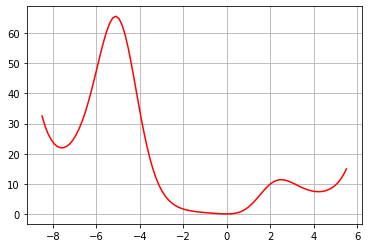

In [11]:
l, r = -5, 2
drawFunction(l, r)
flag = 'no-print'

##### Метод дихотомии

In [12]:
data = {}
n = 0
for j in range(1, 10):
    eps = 10**-j
    d = dichotomyMethod(l, r)
    n = max(n, len(d))
    data[f'eps=1e-{j}'] = d
    
for j in data:
    d = data[j]
    for i in range(n - len(d)):
        d.append(d[-1])
    for i in range(n):
        d[i] = d[i][1] - d[i][0]
    for i in range(n - 1, 0, -1):
        d[i] = d[i] / d[i - 1]
    d[0] = 1
    data[j] = d

df = pd.DataFrame(data)
display(df)

,eps=1e-1,eps=1e-2,eps=1e-3,eps=1e-4,eps=1e-5,eps=1e-6,eps=1e-7,eps=1e-8,eps=1e-9
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.496429,0.499643,0.499964,0.499996,0.500000,0.500000,0.500000,0.500000,0.500000
2,0.492806,0.499285,0.499929,0.499993,0.499999,0.500000,0.500000,0.500000,0.500000
3,0.485401,0.498568,0.499857,0.499986,0.499999,0.500000,0.500000,0.500000,0.500000
4,0.469925,0.497128,0.499714,0.499971,0.499997,0.500000,0.500000,0.500000,0.500000
5,0.436000,0.494224,0.499428,0.499943,0.499994,0.499999,0.500000,0.500000,0.500000
6,0.353211,0.488313,0.498855,0.499886,0.499989,0.499999,0.500000,0.500000,0.500000
7,1.000000,0.476066,0.497704,0.499771,0.499977,0.499998,0.500000,0.500000,0.500000
8,1.000000,0.449725,0.495387,0.499542,0.499954,0.499995,0.500000,0.500000,0.500000
9,1.000000,0.388210,0.490688,0.499084,0.499909,0.499991,0.499999,0.500000,0.500000


#### Метод золотого сечения

In [13]:
data = {}
n = 0
for j in range(1, 10):
    eps = 10**-j
    d = goldenRatioMethod(l, r)
    n = max(n, len(d))
    data[f'eps=1e-{j}'] = d
    
for j in data:
    d = data[j]
    for i in range(n - len(d)):
        d.append(d[-1])
    for i in range(n):
        d[i] = d[i][1] - d[i][0]
    for i in range(n - 1, 0, -1):
        d[i] = d[i] / d[i - 1]
    d[0] = 1
    data[j] = d

df = pd.DataFrame(data)
display(df)

,eps=1e-1,eps=1e-2,eps=1e-3,eps=1e-4,eps=1e-5,eps=1e-6,eps=1e-7,eps=1e-8,eps=1e-9
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.618034,0.618034,0.618034,0.618034,0.618034,0.618034,0.618034,0.618034,0.618034
2,0.618034,0.618034,0.618034,0.618034,0.618034,0.618034,0.618034,0.618034,0.618034
3,0.618034,0.618034,0.618034,0.618034,0.618034,0.618034,0.618034,0.618034,0.618034
4,0.618034,0.618034,0.618034,0.618034,0.618034,0.618034,0.618034,0.618034,0.618034
5,0.618034,0.618034,0.618034,0.618034,0.618034,0.618034,0.618034,0.618034,0.618034
6,0.618034,0.618034,0.618034,0.618034,0.618034,0.618034,0.618034,0.618034,0.618034
7,0.618034,0.618034,0.618034,0.618034,0.618034,0.618034,0.618034,0.618034,0.618034
8,0.618034,0.618034,0.618034,0.618034,0.618034,0.618034,0.618034,0.618034,0.618034
9,0.618034,0.618034,0.618034,0.618034,0.618034,0.618034,0.618034,0.618034,0.618034


#### Метод Фибоначчи

In [14]:
data = {}
n = 0
for j in range(1, 10):
    eps = 10**-j
    d = fibonacciMethod(l, r)
    n = max(n, len(d))
    data[f'eps=1e-{j}'] = d
    
for j in data:
    d = data[j]
    for i in range(n - len(d)):
        d.append(d[-1])
    for i in range(n):
        d[i] = d[i][1] - d[i][0]
    for i in range(n - 1, 0, -1):
        d[i] = d[i] / d[i - 1]
    d[0] = 1
    data[j] = d

df = pd.DataFrame(data)
display(df)

,eps=1e-1,eps=1e-2,eps=1e-3,eps=1e-4,eps=1e-5,eps=1e-6,eps=1e-7,eps=1e-8,eps=1e-9
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.617978,0.618034,0.618034,0.618034,0.618034,0.618034,0.618034,0.618034,0.618034
2,0.618182,0.618033,0.618034,0.618034,0.618034,0.618034,0.618034,0.618034,0.618034
3,0.617647,0.618037,0.618034,0.618034,0.618034,0.618034,0.618034,0.618034,0.618034
4,0.619048,0.618026,0.618034,0.618034,0.618034,0.618034,0.618034,0.618034,0.618034
5,0.615385,0.618056,0.618034,0.618034,0.618034,0.618034,0.618034,0.618034,0.618034
6,0.625000,0.617978,0.618034,0.618034,0.618034,0.618034,0.618034,0.618034,0.618034
7,0.600000,0.618182,0.618033,0.618034,0.618034,0.618034,0.618034,0.618034,0.618034
8,0.666667,0.617647,0.618037,0.618034,0.618034,0.618034,0.618034,0.618034,0.618034
9,1.000000,0.619048,0.618026,0.618034,0.618034,0.618034,0.618034,0.618034,0.618034


#### Метод парабол

In [15]:
data = {}
n = 0
for j in range(1, 10):
    eps = 10**-j
    d = parabolasMethod(l, r)
    n = max(n, len(d))
    data[f'eps=1e-{j}'] = d
    
for j in data:
    d = data[j]
    for i in range(n - len(d)):
        d.append(d[-1])
    for i in range(n):
        d[i] = d[i][1] - d[i][0]
    for i in range(n - 1, 0, -1):
        d[i] = d[i] / d[i - 1]
    d[0] = 1
    data[j] = d

df = pd.DataFrame(data)
display(df)

,eps=1e-1,eps=1e-2,eps=1e-3,eps=1e-4,eps=1e-5,eps=1e-6,eps=1e-7,eps=1e-8,eps=1e-9
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.883206,0.606650,0.692347,0.793227,0.329524,0.656579,0.726607,0.977328,0.838792
2,0.817195,0.668609,0.562374,0.917426,0.908590,0.611249,0.989992,0.784472,0.863199
3,1.000000,0.863738,0.925388,0.988074,0.056510,0.880922,0.999889,0.945863,0.991630
4,1.000000,0.969688,0.976455,0.997861,0.385170,0.996657,0.997219,0.988450,0.998914
5,1.000000,0.965117,0.956853,0.998832,0.501652,0.948298,0.999167,0.006634,0.998703
6,1.000000,0.973332,0.972129,0.999032,1.000000,0.977142,0.998942,0.486994,0.999296
7,1.000000,0.975571,0.970801,0.999365,1.000000,0.969230,0.999437,0.042769,0.999402
8,1.000000,0.980572,0.977577,0.999519,1.000000,0.979098,0.999513,0.806891,0.999608
9,1.000000,0.983952,0.980426,0.999662,1.000000,0.980470,0.999682,0.994095,0.999700


#### Комбинированный метод Брента

In [16]:
data = {}
n = 0
for j in range(1, 10):
    eps = 10**-j
    d = brentCombinedMethod(l, r)
    n = max(n, len(d))
    data[f'eps=1e-{j}'] = d
    
for j in data:
    d = data[j]
    for i in range(n - len(d)):
        d.append(d[-1])
    for i in range(n):
        d[i] = d[i][1] - d[i][0]
    for i in range(n - 1, 0, -1):
        d[i] = d[i] / d[i - 1]
    d[0] = 1
    data[j] = d

df = pd.DataFrame(data)
display(df)

,eps=1e-1,eps=1e-2,eps=1e-3,eps=1e-4,eps=1e-5,eps=1e-6,eps=1e-7,eps=1e-8,eps=1e-9
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.642857,0.642857,0.642857,0.642857,0.642857,0.642857,0.642857,0.642857,0.642857
2,0.777778,0.777778,0.777778,0.777778,0.777778,0.777778,0.777778,0.777778,0.777778
3,0.928571,0.928571,0.928571,0.928571,0.928571,0.928571,0.928571,0.928571,0.928571
4,0.937044,0.937044,0.937044,0.937044,0.937044,0.937044,0.937044,0.937044,0.937044
5,0.618034,0.618034,0.618034,0.618034,0.618034,0.618034,0.618034,0.618034,0.618034
6,0.735386,0.735386,0.735386,0.735386,0.735386,0.735386,0.735386,0.735386,0.735386
7,0.395299,0.395299,0.395299,0.395299,0.395299,0.395299,0.395299,0.395299,0.395299
8,0.596308,0.596308,0.596308,0.596308,0.596308,0.596308,0.596308,0.596308,0.596308
9,0.399335,0.399335,0.399335,0.399335,0.399335,0.399335,0.399335,0.399335,0.399335


### Тестирование методов на многомодальной функции

Dichotomy method found local minimum in 25 steps
x = 9.629560089293388
Where y(x) = -90.79089602213868
Golden Ratio method found local minimum in 50 steps
x = -3.6435971622914813
Where y(x) = -11.637829211755578
Fibonacci method found local minimum in 48 steps
x = -3.6435971696344946
Where y(x) = -11.63782921175558
Parabolas method found local minimum in 24 steps
x = -3.64359716360618
Where y(x) = -11.637829211755578
Combined Brent method found local minimum in 28 steps
x = -3.141592653589793
Where y(x) = -9.869604401089358


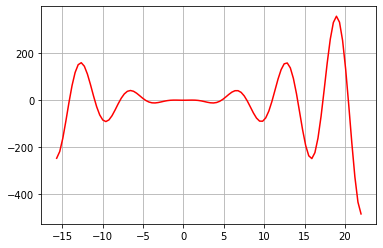

In [17]:
def test(l, r):
    global func
    func = lambda x: x**2 * cos(x)
    drawFunction(l, r)
    dichotomyMethod(l, r)
    goldenRatioMethod(l, r)
    fibonacciMethod(l, r)
    parabolasMethod(l, r)
    brentCombinedMethod(l, r)

        
flag = 'print'
eps = 1e-9
test(-2 * pi, 4 * pi)

### Вывод

В ходе выполнения лабораторной работы были реализованы алгоритмы одномерной минимизации функций без производных: метод дихотомии, метод золотого сечения, метод Фиббоначи, метод парабол и комбинированный метод Брента.

Практическим путем было выяснено, что каждый из этих методов на многомодальной функции не всегда находит даже локальный экстремум.